In [8]:
%matplotlib inline

In [9]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [10]:
fileName = "./reactivity_numberofcrowders.dat"
data = np.loadtxt(fileName)

In [11]:
nSpheres = data[:,0]
N = 2* np.max(nSpheres) # assuming here that there are twice as many places to stick ligand relative to N crowders
cSpheres=nSpheres/np.float(N) # not quite correct, but proportionalitys.b. ok
react=data[:,1]

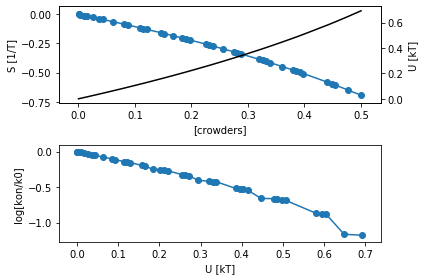

In [12]:
H=0.
L=1
T=1.
N=1. # arbitrary, but should normalize somehow
Ss = L*np.log(N-cSpheres) - L*np.log(L) - L
offset = 1. # using this since sloppy w units, etc
Ss += offset
fig,(axl,ax2) = plt.subplots(2)
# S vs U
axl.scatter(cSpheres, Ss)
axl.plot(cSpheres, Ss,label='S')
axl.set_ylabel("S [1/T]")

axr = axl.twinx()

Us = H - T*Ss
axr.plot(cSpheres, Us,'k')
axl.set_xlabel("[crowders]")
axr.set_ylabel("U [kT]")
#
kons = data[:,1]
k0 = np.max(kons)
lkok0 = np.log(kons/k0)
ax2.scatter(Us,lkok0)
ax2.plot(Us,lkok0)
ax2.plot()
ax2.set_ylabel("log[kon/k0]")
ax2.set_xlabel("U [kT]")
#
plt.tight_layout()

In [13]:
sns.scatterplot(cSpheres, lkok0/np.min(lkok0),hue=cSpheres,size=cSpheres,sizes=(20, 200))
plt.plot(cSpheres,Ss/np.min(Ss)*0.9)
#plt.ylim(0,0.0001)
plt.xlabel('Crowders',fontsize=16)
plt.rc('figure',figsize=(8,5))

In [14]:
#This is what I add to Pete notebook
H=0.
L=1
T=1.
N=1. # arbitrary, but should normalize somehow
Ss = L*np.log(N-cSpheres) - L*np.log(L) - L
offset = 1. # using this since sloppy w units, etc
Ss += offset
fig,(axl) = plt.subplots(1)
# S vs U





axl.scatter(cSpheres, Ss,color="blue",s=80)
axl.plot(cSpheres, Ss,label='S vs [crowders]',color="blue")
#axl.plot(cSpheres, Ss,color="blue")
axl.set_ylabel("S",fontsize=18)
axl.scatter(Us,lkok0)


cmap = sns.cubehelix_palette(dark=0.3, light=.8, as_cmap=True)
g=sns.scatterplot(Us,lkok0,hue=cSpheres,size=cSpheres,sizes=(100,100),palette=cmap)#add hue=cSpheres if you wanna change the size as well
#g=sns.scatterplot(Us,lkok0,hue=cSpheres,size=cSpheres,sizes=(20, 200),palette=cmap)
leg = g.axes.get_legend()
leg=axl.get_legend()
leg.set_title('Crowders')

#leg.set_title('Size')
axl.plot(Us,lkok0,label='$U_s$ vs $\ln{(k_{on}/k_0)}$',color='black',linewidth=0.4)
#axl.plot(Us,lkok0, label='log[kon/k0] vs $U_s[kT]$')
axr = axl.twinx()

axr.tick_params(labelsize=14)
axu = axl.twiny()
axu.tick_params(labelsize=14)
Us = H - T*Ss
#axr.plot(cSpheres, Us,'k')


axr.legend(fontsize=17)

axl.set_xlabel("Crowders",fontsize=18)
axl.tick_params(axis='y',labelsize=14)
axl.tick_params(axis='x',labelsize=14)
axr.set_ylabel("$\ln{(k_{on}/k_0)}$",fontsize=18)
axu.set_xlabel("$U_s$ [kT]",fontsize=18)
#
axl.legend(fontsize=16)

#axl.legend(fontsize=16)
leg.set
kons = data[:,1]
k0 = np.max(kons)
lkok0 = np.log(kons/k0)

#ax2.scatter(Us,lkok0)
#ax2.plot(Us,lkok0)
#ax2.set_ylabel("log[kon/k0]")
#ax2.set_xlabel("U [kT]")
#
params = {'legend.fontsize': 16,'legend.handlelength': 3}
plt.rcParams.update(params)
plt.rc('figure', figsize=(10, 5))
plt.gcf().savefig("Energy_of_reactivity.png",dpi=700)
plt.show()

No handles with labels found to put in legend.
